# **What Affects Sleep Quality?**
Fall 2024 Data Science Project

Anika Aracan, Davis Xu, Jason Wisdom, Silas Rager

Contributions:

Anika -
* A: Project Idea
  * Found and chose the Kaggle dataset
* G: Final Tutorial Report Creation
  * Initially drafted the explantion paragraphs to the Data Curation and Exploratory Data Analysis section. Wrote the Introduction section, did the analysis on Sleep Duration using Jason's code, and wrote the conclusion.

Davis -

* B: Dataset Curation and Preprocessing
  * Imported dataset and performed all necessary preprocessing
* C: Data Exploration and Summary Statistics
  * Wrote hypothesis and code for chi-squared testing section
* G: Final Tutorial Report Creation
  * Added all the explanation paragraphs to the Data Curation and Exploratory Data Analysis sections, along with the explanation paragraphs at the start of the Primary Analysis section (before Physical Activity Model)

Jason -

Silas -

## **Introduction**

With the importance of sleep always being emphasized to us, our group has decided to train a model to predict the quality of sleep based on a variety of different factors, including BMI, blood pressure, and step count. The dataset we are using is ideal for health research, containing data like sleep duration, physical activity, and stress levels. Some specific questions we are trying to answer include:

*   How does physical activity level correlate with the quality of sleep?
*   Does higher BMI or blood pressure lead to poorer sleep quality?
*  Can stress levels serve as a significant predictor for sleep disruption?
*  What combination of factors best predicts the quality of sleep, and can we identify at-risk individuals who may benefit from lifestyle adjustments?

Answering these questions is extremely important because finding the answers can help many people, allowing them to find reasons why their sleep may not be as good as it should be.






## **Data Curation**

### **Data Collection**

This step is where we collect the necessary data for our analysis. We are sourcing the data from [this](https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset) sleep health dataset on Kaggle, and importing it into a [Pandas dataframe](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html). This structures the data into and provides many helpful functions we can utilize.

The first step is installing [opendatasets](https://pypi.org/project/opendatasets/), a Python library that allows us to easily import datasets from sites like Kaggle. The below command only needs to be ran at the beginning of a session.

In [ ]:
pip install opendatasets

Here we import all the modules needed for the rest of the tutorial.

In [ ]:
import opendatasets as od
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

#import matplotlib
#from sklearn.cluster import KMeans, DBSCAN
#from sklearn.decomposition import PCA
#from sklearn.manifold import TSNE
#from matplotlib.colors import Normalize

This next step uses opendatasets to download the dataset from Kaggle. A Kaggle account and API token are required to complete the download at the beginning of a session. After logging into or creating a Kaggle account, nagivate to the [account settings page](https://www.kaggle.com/settings/account). Under the API section you will find and option to create a new token. This will download a JSON file with your username and key which you can then enter into the respective prompts below.

In [ ]:
# You need a Kaggle API key for this
# Can make one in your account settings
od.download("https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset")

Skipping, found downloaded files in "./sleep-health-and-lifestyle-dataset" (use force=True to force download)


This dataset provides data on variables related to sleep and daily habits, including gender, age, occupation, sleep duration, quality of sleep, physical activity level, stress level, BMI category, blood pressure, heart rate, daily steps, and the presence / absence of sleep disorders.

### **Data Preprocessing**

Now we move on to the preprocessing step. This is where we inspect and clean the data to ensure quality. First we use the Pandas [read_csv](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) function to load the data from a [CSV file](https://en.wikipedia.org/wiki/Comma-separated_values) into a dataframe. Then we use the [head](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.head.html) function to display the first specified number of rows in the dataframe, in this case 20.

In [ ]:
main_df = pd.read_csv("sleep-health-and-lifestyle-dataset/Sleep_health_and_lifestyle_dataset.csv")
main_df.head(20)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
5,6,Male,28,Software Engineer,5.9,4,30,8,Obese,140/90,85,3000,Insomnia
6,7,Male,29,Teacher,6.3,6,40,7,Obese,140/90,82,3500,Insomnia
7,8,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN
8,9,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN
9,10,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN


Here we can use the [data type](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dtypes.html) function to show the data types of each feature in the dataframe. These are useful to know in case we want to modify values in a specific column.

In [ ]:
main_df.dtypes

,0
Person ID,int64
Gender,object
Age,int64
Occupation,object
Sleep Duration,float64
Quality of Sleep,int64
Physical Activity Level,int64
Stress Level,int64
BMI Category,object
Blood Pressure,object


You may have noticed in the first few columns of the dataframe the BMI category includes both "Normal" and "Normal Weight". Since they both represent the same thing, this is a great example of something we should clean up. A simple [replace](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.replace.html) function does the trick.

In [ ]:
main_df.replace("Normal Weight", "Normal", inplace=True)
main_df.head(20)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
5,6,Male,28,Software Engineer,5.9,4,30,8,Obese,140/90,85,3000,Insomnia
6,7,Male,29,Teacher,6.3,6,40,7,Obese,140/90,82,3500,Insomnia
7,8,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN
8,9,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN
9,10,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN


Now I'm going to add a "Mean Arterial Pressure" column. [Blood pressure](https://www.heart.org/en/health-topics/high-blood-pressure/understanding-blood-pressure-readings) is comprised of systolic (first number) and diastolic (second number) blood pressure. [Mean arterial pressure (MAP)](https://en.wikipedia.org/wiki/Mean_arterial_pressure) is an average of these blood pressures. This is essentially converting the blood pressure column of strings into a usable value for regression analysis later on.

$$MAP = Diastolic + \frac{1}{3}(Systolic - Diastolic)$$



In [ ]:
def calc_map(blood_pressure):
  bp_split = blood_pressure.split('/')
  systolic, diastolic = map(int, bp_split)
  return diastolic + (1/3) * (systolic - diastolic)

main_df["Mean Arterial Pressure"] = main_df["Blood Pressure"].apply(calc_map)

Here's a final display of the dataframe before we move on to intial exploration.

In [ ]:
main_df

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Mean Arterial Pressure
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN,97.333333
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN,95.000000
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN,95.000000
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,106.666667
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,106.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,110.000000
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,110.000000
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,110.000000
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,110.000000


## **Exploratory Data Analysis**

This step is where we perform some initial statistical analysis to try and extract some useful patterns or insight from our data. This involves hypothesis testing, which we will perform three of. Each test will also come with a nice plot that will help visualize these patterns. We will be using [SciPy](https://scipy.org/) for the hypothesis testing and [Matplotlib](https://matplotlib.org/stable/) for our plots.

### **Hypothesis Testing Through ANOVA**

The first test we will be using is ANOVA (Analysis of Variance). This test compares the means of several groups, usually **three or more**, to assess for any significant differences. You can learn more about it [here](https://www.jmp.com/en_us/statistics-knowledge-portal/one-way-anova.html).

Here we are looking at the BMI groups of a person (Normal, Obese, Overweight), and how this affects their heart rate. We use SciPy's nice [ANOVA function](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html) to determine the resulting p-value. Below are our null and alternative hypotheses:


*Null Hypothesis:* A person's BMI category does not have an effect on the person's heart rate.

*Alternative Hypothesis:* A person's BMI category will affect their heart rate.

(Assume $α=0.05$)

To obtain the heart rates, we first group the dataframe by BMI using [groupby](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html). Then we iterate through and collect the heart rates into a single variable, which is passed into the ANOVA function.

In [ ]:
BMI_dfs = main_df.groupby(['BMI Category'], dropna=False)
heart_rates = [k['Heart Rate'] for _, k in BMI_dfs]
anova_results = stats.f_oneway(*heart_rates)
anova_results.pvalue

1.3185477732384945e-38

As the p-value for the ANOVA test is lower than the level of statistical significance, we can conclude that a person's heart rate is affected by what BMI category they are in.

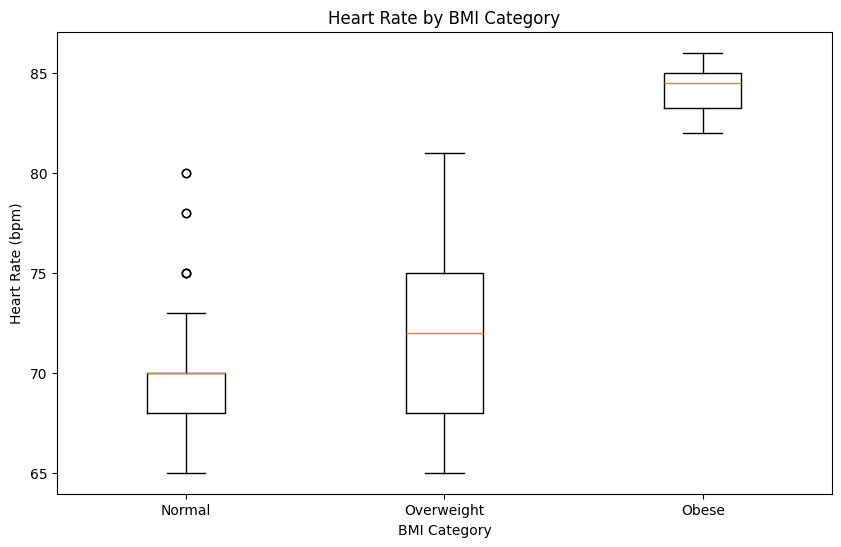

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))

#In order of increasing weight
BMI_categories = ["Normal", "Overweight", "Obese"]
heart_rates = [[k['Heart Rate'] for _, k in BMI_dfs if k['BMI Category'].values[0] == category][0]
               for category in BMI_categories]

#heart_rates = []
#BMI_categories = []
#for i, k in BMI_dfs:
#  heart_rates.append(k['Heart Rate'])
#  BMI_categories.append(k['BMI Category'].values[0])

plt.boxplot(heart_rates, labels=BMI_categories)
plt.title('Heart Rate by BMI Category')
plt.ylabel('Heart Rate (bpm)')
plt.xlabel('BMI Category')
plt.show()

### **Hypothesis Testing Through T-Tests**

Our second test will be a two-sampled T-test. This is used to compare the means of **two** different samples. You can learn more about it [here](https://www.jmp.com/en_us/statistics-knowledge-portal/t-test/two-sample-t-test.html).

Here we are looking at two groups of people, those with high (> 5000) steps and those with low (<= 5000) steps, and how this affects their sleep duration. We are using SciPy's [T-test function](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html) to calculate the p-value. Below are our null and alternative hypotheses:



High steps = steps > 5000

*Null Hypothesis:* There is no significant difference in sleep duration between individuals with high and low daily steps.

*Alternative Hypothesis:* There is a significant difference in sleep duration between individuals with high and low daily steps.

(Assume $α=0.05$)

Before testing, we need to split the data into the respective groups. This is simply done using a conditional. The two groups are then passed to the T-test function.

In [ ]:
limit = 5000
high_steps_group = main_df[main_df['Daily Steps'] >= limit]['Sleep Duration']
low_steps_group = main_df[main_df['Daily Steps'] < limit]['Sleep Duration']

t_stat, p_value = stats.ttest_ind(high_steps_group, low_steps_group)
print(f"t-statistic: {t_stat}")
print(f"p-value: {p_value}")

t-statistic: 2.445814907367563
p-value: 0.014915155800785463


Because the p-value for this T-test is lower than the specified level of significance, we reject the null hypothesis. There is a significant difference in sleep duration between high and low step groups.

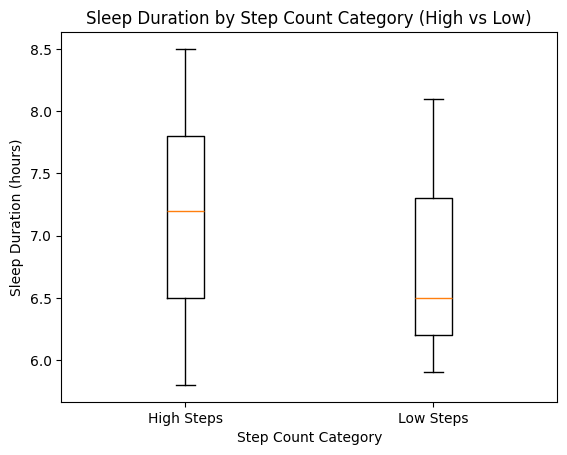

In [ ]:
plt.figure()
plt.boxplot([high_steps_group, low_steps_group], labels=['High Steps', 'Low Steps'])
plt.title('Sleep Duration by Step Count Category (High vs Low)')
plt.ylabel('Sleep Duration (hours)')
plt.xlabel('Step Count Category')
plt.show()

### **Hypothesis Testing Through Chi-Squared Test**

Our final test will be a Chi-Squared test, which looks at two sets of categorical values to determine if they come from the same distribution. You can learn more about this test [here](https://www.jmp.com/en_us/statistics-knowledge-portal/chi-square-test.html).

Here we are looking at a person's BMI category (Normal, Obese, Overweight) determining whether or not that affects their likelihood of having a sleeping disorder. We are using SciPy's [Chi-Squared function](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html) to determine the p-value. Below are our null and alternative hypotheses:

*Null Hypothesis:* A person's BMI category does not have an effect the person's likelihood of having a sleeping disorder

*Alternative Hypothesis:* A person's BMI category does have an effect the person's likelihood of having a sleeping disorder

(Assume $α=0.05$)

First we need to create a contingency table to pass to the SciPy function. Each BMI category is listed alongside whether or not those in that category have a sleeping disorder.

Since the Sleep Disorder column in the original dataframe either lists a sleeping disorder or "NaN", we need to convert this into usable "Yes" or "No" columns. The [isna](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isna.html) function helps determine if a value is "NaN", returning a boolean table. We can then iterate through that, converting "True" values to "No" and "False" values to "Yes". Finally we form the contingency table.

In [ ]:
bmi_category = main_df.loc[:, 'BMI Category']
sleeping_disorder = main_df['Sleep Disorder'].isna()
have_sd = {}

for index, value in sleeping_disorder.items():
  if value:
    have_sd[index] = 'No'
  else:
    have_sd[index] = 'Yes'

have_sd = pd.Series(have_sd)
table = pd.crosstab(bmi_category, have_sd, colnames=['Has Sleeping Disorder'])
table

Has Sleeping Disorder,No,Yes
BMI Category,,
Normal,200,16
Obese,0,10
Overweight,19,129


In [ ]:
res = stats.chi2_contingency(table)
res.pvalue

7.270524885184559e-54

The p-value is much smaller than the significane level of 0.05, thus we reject the null hypothesis. A person's BMI category does affect their likelihood of having a sleeping disorder.

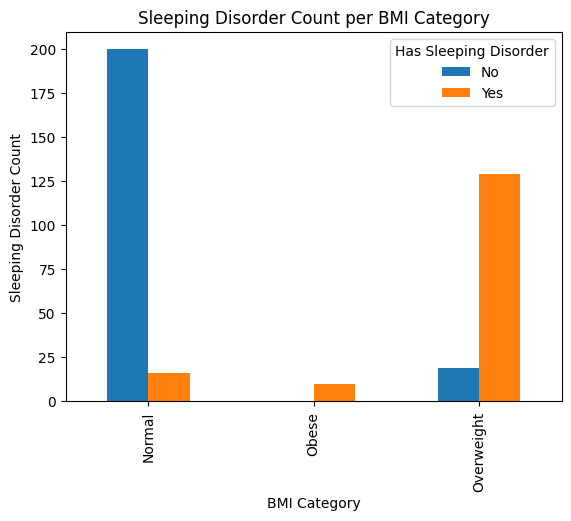

In [ ]:
plot = table.plot(kind="bar")
plt.ylabel('Sleeping Disorder Count')
plt.title('Sleeping Disorder Count per BMI Category')
plt.show()

## **Primary Analysis**

Now we will move on to our primary analysis using machine learning. Machine learning algorithms are those that are able to uncover patterns from given data and "learn" from them, allowing us to predict outcomes.

Given the questions we decided to focus on, we have chosen to use regression analysis as our machine learning technique. Because we are looking at how a specific variable affects sleep quality, which is a real-valued feature, regression is the better choice here as opposed to a technique like classification, which focuses on categorizing data. Specifically, we are using multiple linear regression models to answer each question. Linear regression is a model that calculates the best fit line between two variables. This line is that which best represents the two-variable relationship. You can learn more about linear regression [here](https://www.ibm.com/topics/linear-regression).

Before we get into the analysis of each variable, here we define some useful functions and constants that we will utilize.

We will be using [Mean Squared Error (MSE)](https://statisticsbyjim.com/regression/mean-squared-error-mse/) and [$R^2$](https://statisticsbyjim.com/regression/interpret-r-squared-regression/) values for evaluating our models' performance. MSE is used to measure the amount of error in the model. $R^2$ determines the goodness of fit, with values ranging between 0 (model explains no variation) and 1 (model explains all variation). This value can also be negative if the fit is really bad.

In [ ]:
# Function to fit the model
def fit_model(X_train, Y_train):
    model = LinearRegression().fit(X_train, Y_train)
    return model

# Function to predict using the fitted model
def predict_data(model, X_train, X_test):
    Y_train_pred = model.predict(X_train)
    Y_test_pred = model.predict(X_test)
    return Y_train_pred, Y_test_pred

# Function to calculate MSE and R^2
def evaluate_model(Y_train, Y_train_pred, Y_test, Y_test_pred):
    mse_train = mean_squared_error(Y_train, Y_train_pred)
    mse_test = mean_squared_error(Y_test, Y_test_pred)
    r2_train = r2_score(Y_train, Y_train_pred)
    r2_test = r2_score(Y_test, Y_test_pred)
    return mse_train, mse_test, r2_train, r2_test

seed = 42
test_size=0.2
scaler = StandardScaler()

Y = main_df['Quality of Sleep'] # Using quality of sleep as target data

### **Physical Activity Model**

We can start with looking at the relationship between physical activity level and sleep quality. In order to determine whether or not there is a correlation between the two, we need to make a linear regression model that measures their relationship.

In [ ]:
X_physical = main_df.loc[:, ['Physical Activity Level']] # Using physical activity data as independent variable

# Split training data and use the seed to get consistent results.
X_physical_train, X_physical_test, y_physical_train, y_physical_test = train_test_split(X_physical, Y, test_size=test_size, random_state=seed)

# Scaling data to make the data consistent al
X_physical_train_scaled = scaler.fit_transform(X_physical_train)
X_physical_test_scaled = scaler.transform(X_physical_test)


physical_activity_model = fit_model(X_physical_train_scaled, y_physical_train)
y_physical_train_pred, y_physical_test_pred = predict_data(physical_activity_model, X_physical_train_scaled, X_physical_test_scaled)

# Testing to see how well the model fits the data
mse_physical_train, mse_physical_test, r2_physical_train, r2_physical_test = evaluate_model(y_physical_train, y_physical_train_pred, y_physical_test, y_physical_test_pred)

print("Physical Activity Results:")
print(f"  MSE Train: {mse_physical_train:.4f}")
print(f"  MSE Test: {mse_physical_test:.4f}")
print(f"  R2 Train: {r2_physical_train:.4f}")
print(f"  R2 Test: {r2_physical_test:.4f}")


Physical Activity Results:
  MSE Train: 1.3593
  MSE Test: 1.4583
  R2 Train: 0.0260
  R2 Test: 0.0333


Stress is a good predictor of sleep quality, with $R^2 = 0.8277$, meaning most of the variability in quality is explained by stress level.

### **Mean Arterial Pressure Model**

In order to determine wheter or not a higher mean arterial pressure results in lower sleep quality, we need to make a linear regression model that measures the relationship between the two.

In [ ]:
X_blood = main_df.loc[:, ['Mean Arterial Pressure']] # Creating model using mean arterial pressure as the variable of interest

# Split training data and use the seed to get consistent results.
X_blood_train, X_blood_test, y_blood_train, y_blood_test = train_test_split(X_blood, Y, test_size=test_size, random_state=seed)

X_blood_train_scaled = scaler.fit_transform(X_blood_train)
X_blood_test_scaled = scaler.transform(X_blood_test)

blood_pressure_model = fit_model(X_blood_train_scaled, y_blood_train)
y_blood_train_pred, y_blood_test_pred = predict_data(blood_pressure_model, X_blood_train_scaled, X_blood_test_scaled)

# Testing to see how well the model fits the data and printing the results
mse_blood_train, mse_blood_test, r2_blood_train, r2_blood_test = evaluate_model(y_blood_train, y_blood_train_pred, y_blood_test, y_blood_test_pred)

print("Mean Arterial Pressure Results:")
print(f"  MSE Train: {mse_blood_train:.4f}")
print(f"  MSE Test: {mse_blood_test:.4f}")
print(f"  R2 Train: {r2_blood_train:.4f}")
print(f"  R2 Test: {r2_blood_test:.4f}")

Mean Arterial Pressure Results:
  MSE Train: 1.3732
  MSE Test: 1.5701
  R2 Train: 0.0160
  R2 Test: -0.0407


Mean Arterial Pressure is not a good indicator of sleep quality because the $R^2$ are low and negative, meaning they are not relevant. Furthermore, the MSE results are very high.

### **Stress Level Model**

In order to determine wheter or not stress level can be used to accurately predict sleep quality, we need to make a linear regression model that measures the relationship between the two.

In [ ]:
X_stress = main_df.loc[:, ['Stress Level']] # Creating model using stress level as independent variable
X_stress_train, X_stress_test, y_stress_train, y_stress_test = train_test_split(X_stress, Y, test_size=test_size, random_state=seed)

X_stress_train_scaled = scaler.fit_transform(X_stress_train)
X_stress_test_scaled = scaler.transform(X_stress_test)

stress_level_model = fit_model(X_stress_train_scaled, y_stress_train)
y_stress_train_pred, y_stress_test_pred = predict_data(stress_level_model, X_stress_train_scaled, X_stress_test_scaled)

mse_stress_train, mse_stress_test, r2_stress_train, r2_stress_test = evaluate_model(y_stress_train, y_stress_train_pred, y_stress_test, y_stress_test_pred)

# Testing to see how well the model fits the data
print("Stress Level Results:")
print(f"  MSE Train: {mse_stress_train:.4f}")
print(f"  MSE Test: {mse_stress_test:.4f}")
print(f"  R2 Train: {r2_stress_train:.4f}")
print(f"  R2 Test: {r2_stress_test:.4f}")

Stress Level Results:
  MSE Train: 0.2787
  MSE Test: 0.2600
  R2 Train: 0.8003
  R2 Test: 0.8277


Stress is a good predictor of sleep quality, with $R^2 = 0.8277$, meaning most of the variability in quality is explained by stress level.

### **Sleep Duration**

From the correlation table in the Exploratory Data Analysis Section, we saw that Sleep Quality and Sleep Duration are highly correlated. So to measure the relationship between the two, we are making a linear regression model.

In [ ]:
# Creating model using hours slept as independent variable
X_hours = main_df.loc[:, ['Sleep Duration']]

# Training the model
X_hours_train, X_hours_test, y_hours_train, y_hours_test = train_test_split(X_hours, Y, test_size=test_size, random_state=seed)

X_hours_train_scaled = scaler.fit_transform(X_hours_train)
X_hours_test_scaled = scaler.transform(X_hours_test)

hours_level_model = fit_model(X_hours_train_scaled, y_hours_train)
y_hours_train_pred, y_hours_test_pred = predict_data(hours_level_model, X_hours_train_scaled, X_hours_test_scaled)

mse_hours_train, mse_hours_test, r2_hours_train, r2_hours_test = evaluate_model(y_hours_train, y_hours_train_pred, y_hours_test, y_hours_test_pred)

# Testing to see how well the model fits the data
print("Hours Slept Results:")
print(f"  MSE Train: {mse_hours_train:.4f}")
print(f"  MSE Test: {mse_hours_test:.4f}")
print(f"  R2 Train: {r2_hours_train:.4f}")
print(f"  R2 Test: {r2_hours_test:.4f}")

Hours Slept Results:
  MSE Train: 0.3046
  MSE Test: 0.3547
  R2 Train: 0.7817
  R2 Test: 0.7649


The amount of hours slept is a good predictor of sleep quality, with $R^2 = 0.7649$ and lower MSE of 0.3547. This indicates that it is fairy accurate, with the model doing better on the training data than the test data.  



## **Visualization**

### **Physical Activity Plot**

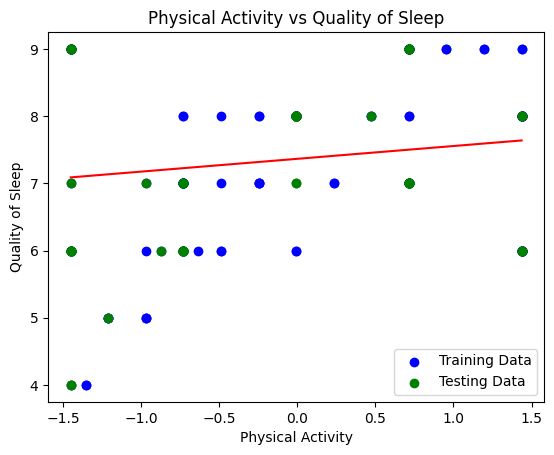

Slope: 0.1904
Y-Intercept: 7.3645


In [ ]:
#physical activity against quality of sleep for all data
plt.scatter(X_physical_train_scaled, y_physical_train, color='blue', label='Training Data')
plt.scatter(X_physical_test_scaled, y_physical_test, color='green', label='Testing Data')
plt.xlabel('Physical Activity')
plt.ylabel('Quality of Sleep')
plt.title('Physical Activity vs Quality of Sleep')
plt.legend()


#linear regression line
x_line = np.linspace(X_physical_train_scaled.min(), X_physical_train_scaled.max(), 100)
y_line = physical_activity_model.predict(x_line.reshape(-1, 1))
plt.plot(x_line, y_line, color='red', label='Linear Regression Line')

plt.show()

# slope and y intercept of regression line
print(f"Slope: {physical_activity_model.coef_[0]:.4f}")
print(f"Y-Intercept: {physical_activity_model.intercept_:.4f}")

#positive R2 value means small positive correlation between physical activity and sleep quality
#the R2 of the test data was even smaller than the training data

### **Mean Arterial Pressure Plot**

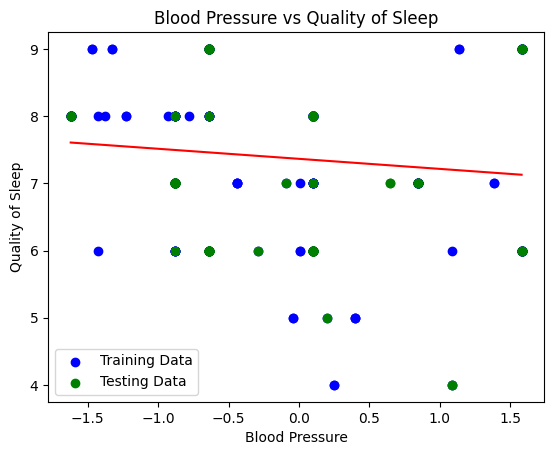

Slope: -0.1496
Y-Intercept: 7.3645


In [ ]:
#arterial pressure against quality of sleep for all data
plt.scatter(X_blood_train_scaled, y_blood_train, color='blue', label='Training Data')
plt.scatter(X_blood_test_scaled, y_blood_test, color='green', label='Testing Data')
plt.xlabel('Blood Pressure')
plt.ylabel('Quality of Sleep')
plt.title('Blood Pressure vs Quality of Sleep')
plt.legend()


#linear regression line
x_line = np.linspace(X_blood_train_scaled.min(), X_blood_train_scaled.max(), 100)
y_line = blood_pressure_model.predict(x_line.reshape(-1, 1))
plt.plot(x_line, y_line, color='red', label='Linear Regression Line')

plt.show()

# slope and y intercept of regression line
print(f"Slope: {blood_pressure_model.coef_[0]:.4f}")
print(f"Y-Intercept: {blood_pressure_model.intercept_:.4f}")

#another negative R2 value meaning very poor predictor of sleep

### **Stress Level Plot**

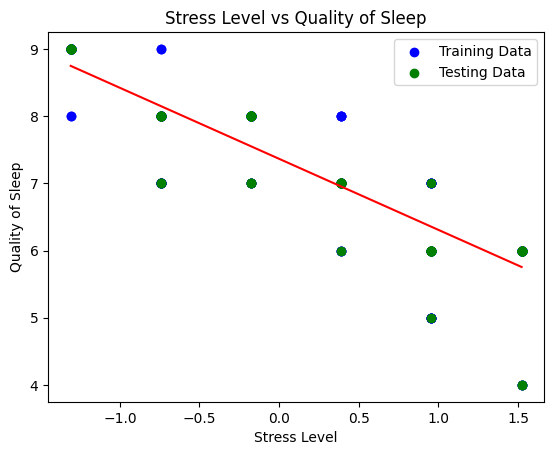

Slope: -1.0568
Y-Intercept: 7.3645


In [ ]:
#stress level against quality of sleep for all unscaled data
plt.scatter(X_stress_train_scaled, y_stress_train, color='blue', label='Training Data')
plt.scatter(X_stress_test_scaled, y_stress_test, color='green', label='Testing Data')
plt.xlabel('Stress Level')
plt.ylabel('Quality of Sleep')
plt.title('Stress Level vs Quality of Sleep')
plt.legend()

#linear regression line
x_line = np.linspace(X_stress_train_scaled.min(), X_stress_train_scaled.max(), 100)
y_line = stress_level_model.predict(x_line.reshape(-1, 1))
plt.plot(x_line, y_line, color='red', label='Linear Regression Line')

plt.show()
# slope and y intercept of regression line
print(f"Slope: {stress_level_model.coef_[0]:.4f}")
print(f"Y-Intercept: {stress_level_model.intercept_:.4f}")


### **Sleep Duration Plot**

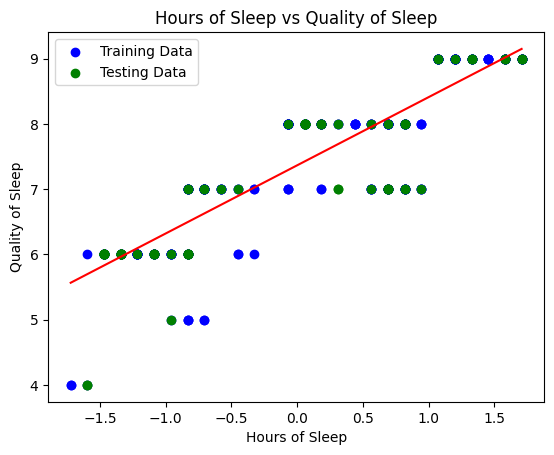

Slope: 1.0445
Y-Intercept: 7.3645


In [ ]:
# Hours of sleep against quality of sleep for all scaled data
plt.scatter(X_hours_train_scaled, y_hours_train, color='blue', label='Training Data')
plt.scatter(X_hours_test_scaled, y_hours_test, color='green', label='Testing Data')
plt.xlabel('Hours of Sleep')
plt.ylabel('Quality of Sleep')
plt.title('Hours of Sleep vs Quality of Sleep')
plt.legend()

# Linear regression line
x_line = np.linspace(X_hours_train_scaled.min(), X_hours_train_scaled.max(), 100)
y_line = hours_level_model.predict(x_line.reshape(-1, 1))
plt.plot(x_line, y_line, color='red', label='Linear Regression Line')

plt.show()
# Slope and y-intercept of regression line
print(f"Slope: {hours_level_model.coef_[0]:.4f}")
print(f"Y-Intercept: {hours_level_model.intercept_:.4f}")

## **Insights and Conclusions**

After reading through the project, an uninformed reader would feel informed about the topic. The project does a good job of introducing the topic of sleep quality and why it is important. Afterwards, all of the key concepts in each section are explained as well, including BMI, blood pressure, step count, and hours slept. Each section's goal and conclusion are clearly stated, and the visualizations are all clearly labeled and the importance of them are explained. By the end of the tutorial, the reader would know that the amount of hours you sleep and your stress level have a huge impact on your quality of sleep while physical activity and arterial pressure do not. Therefore, the uninformed user would know to focus on increasing the amount of hours they sleep and lowering their stress level to improve their quality of sleep.

For informed readers, on the other hand, they gain a deeper understanding on how correlated these topics really are to their quality of sleep. The analysis quantifies the correlations between factors like stress levels, hours slept, physical activity, and blood pressure, showing the strengths of these relationships to the quality of sleep. Specifically, it highlights that stress level has the highest impact on sleep quality with an $R^2$ value of 0.83 with sleep duration following with 0.7649. Physical activity and blood pressure are more similar in how they affect sleep quality, with $R^2$ values of 0.0333 and -0.0407; they have little to no impact.

